# 因果フォレスト（Causal Forests）をPythonで実践的に学ぶ（その４） 因果フォレストのチューニングと最適化（前半）

url: https://www.salesanalytics.co.jp/datascience/datascience188/

    因果推論は、ビジネスや研究の多くの分野での意思決定を支える重要な手法となっています。

    特に因果フォレストは、複雑なデータ構造の中から因果関係を明らかにするのに非常に効果的です。

    前回はデフォルトの設定のまま、実際のデータを用いて因果フォレストのモデル構築、そして結果の可視化までの手順を解説しました。

    url: https://www.salesanalytics.co.jp/datascience/datascience187/

    適切なモデルを構築するためには、ハイパーパラメータがある場合には、そのチューニングによる最適化が欠かせません。

    ハイパーパラメータは、機械学習モデルの学習過程を制御するためのパラメータです。
    これは、モデルの学習中には更新されないが、モデルのパフォーマンスや学習の速度に大きな影響を与える変数です。
    例えば、ランダムフォレストの木の数や深さ、学習率などは、ハイパーパラメータの典型的な例です。

    今回も、PythonのEconMLライブラリを用いて紹介します。

    このEconMLのCausalForestDMLには、3種類のハイパーパラメータが登場します。
    ・因果フォレストそのものののハイパーパラメータ
    ・トリートメントモデルのハイパーパラメータ
    ・アウトカムモデルのハイパーパラメータ


    トリートメントモデルとアウトカムモデルに関しては、そのモデル構築で利用するアルゴリズムにハイパーパラメータがある場合です。
    ・例えば、通常の線形回帰（単回帰や重回帰など）にはハイパーパラメータがないため、調整するハイパーパラメータはありません。
    ・例えば、Ridge回帰やLasso回帰、ランダムフォレストなどにはハイパーパラメータがあるため、ハイパーパラメータを調整する余地がでてきます。

    因果フォレストそのものは、ランダムフォレストをベースにしているため、ハイパーパラメータがあります。

    今回は、因果フォレストそのもののハイパーパラメータをチューニングし最適化したいと思います。

    次回は、トリートメントモデルとアウトカムモデルのハイパーパラメータのチューニングも扱います。

## 因果フォレストそのもののハイパーパラメータ
### CausalForestDMLのハイパーパラメータ
    因果フォレストそのものは、ランダムフォレストをベースにしているため、ランダムフォレストと似たようなハイパーパラメータがあります。

    以下、EconMLのCausalForestDMLの主要なハイパーパラメータの一覧です。

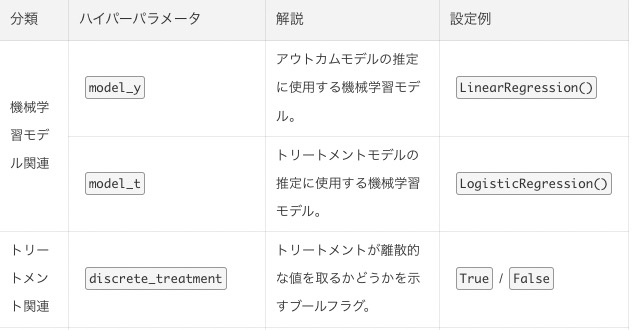

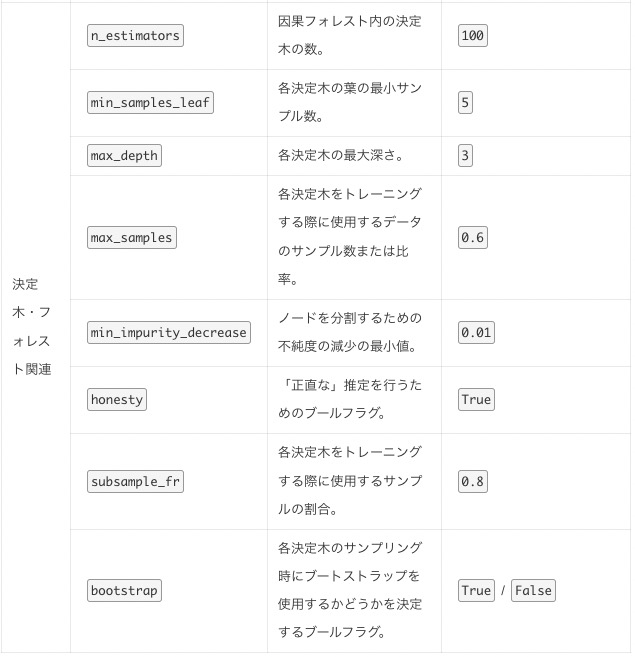

    今回は、決定木・フォレスト関連の以下の3つのハイパーパラメータを調整していきます。

    ・‘n_estimators’: 因果フォレスト内の決定木の数
    ・‘min_samples_leaf’: 各決定木の葉の最小サンプル数。
    ・‘max_depth’: 各決定木の最大深さ。

    ちなみに、機械学習モデル・トリートメント関連もハイパーパラメータです。

    そこも調整できますが、今回は次のように設定します。

    ・‘model_y’:LinearRegression()
    ・‘model_t’:LogisticRegression()
    ・‘discrete_treatment’:True

    今回は、アウトカムモデルとして線形回帰（LinearRegression）を、トリートメントモデルとして
    ロジスティック回帰（LogisticRegression）を用います。トリートメントは離散（0-1）としています。

    先ほども言及しましたが、トリートメントモデルとアウトカムモデルのモデルにハイパーパラメータがあれば、そこもチューニング対象にすることができます。

    要は、どの機械学習モデルを使うのかというチューニングと、個々の機械学習モデルのハイパーパラメータのチューニングがあるということです。今回は扱いません。

## チューニング方法（調整方法）
    適切なハイパーパラメータの設定は、モデルの性能を大幅に向上させることができます。
    逆に、不適切なハイパーパラメータの設定は、モデルのオーバーフィットや学習の遅延を引き起こす可能性があります。

    特に、因果推論のような複雑なタスクでは、適切なハイパーパラメータの選択が、信頼性の高い結果を得るための鍵となります。

    ハイパーパラメータの調整には、以下の3つの主要な手法があります。
    ・グリッドサーチ: 事前に定義したハイパーパラメータの組み合わせをすべて試す方法。計算量が多いが、範囲内で最適な組み合わせを見つけることができる。
    ・ランダムサーチ: ハイパーパラメータの範囲をランダムにサンプリングして、試す方法。グリッドサーチよりも高速で、多くの場合、十分に良い結果を得られる。
    ・ベイズ最適化: 確率的な手法を用いて、ハイパーパラメータの最適な組み合わせを探索する方法。計算量は中程度だが、高い精度でハイパーパラメータを調整することができる。

    今回は、グリッドサーチで実施したいと思います。

## 評価指標
    因果推論のタスクでは、モデルの評価が非常に重要です。
    モデルがデータに対してどれだけ正確に因果関係を捉えているのかを知ることで、ビジネス上の意思決定の質を向上させることができます。

    主な評価指標としては以下のようなものが考えられます。

    ・平均二乗誤差 (MSE): 実際の因果効果とモデルによって予測された因果効果との差の平方の平均。値が小さいほどモデルの予測精度が高い。
    ・R-squared: モデルがデータの変動をどれだけ説明しているかを示す指標。1に近いほどモデルがデータをよく説明している。

    モデルの評価は、モデルが新しいデータに対してどれだけの性能を発揮するのかを知る上で不可欠です。
    特に、ビジネスの意思決定に影響を与える可能性のあるモデルを使用する場合、適切な評価が求められます。

    今回は、MSE（平均二乗誤差）で評価していきます。デフォルトの設定なので、特に意識する必要はありません。



## ＣＶ（クロスバリデーション）
    CV（クロスバリデーション）は、データセットを複数の部分に分割し、その一部をテストデータとして使用しながらモデルの性能を評価する方法です。

    この手法により、モデルが新しいデータに対してどれだけ一般化できるのかを評価することができます。

    主な手法としては以下のようなものがあります。

    ・k分割交差検証 (k-fold cross-validation): データをk個の部分に分割し、そのうちの1つをテストデータとして使用し、残りを学習データとして使用。
    これをk回繰り返し、k回の平均の性能を評価とする。
    ・一つ抜き交差検証 (Leave-One-Out Cross-Validation, LOOCV): データの一つ一つをテストデータとして使用し、残りを学習データとして使用。
    データの数だけ評価を行い、その平均を性能とする。

    今回は、10分割CV（交差検証）で実施していきます。

    10分割CVの場合、ハイパーパラメータの組み合わせごとにMSEが10個出力されます。
    この10個のMSEの平均値を最小化するハイパーパラメータの組み合わせをグリッドサーチで探索していきます。

## サンプルデータで実施
    以下の2つのサンプルデータを使います。
    不動産業: cf_sampledata_1.csv (https://www.salesanalytics.co.jp/yehi)
    製薬業: cf_sampledata_2.csv (https://www.salesanalytics.co.jp/xnlp)
    
    それぞれのサンプルデータで、2種類の因果フォレストを構築し、因果効果をプロットします。

    ・ハイパーパラメータチューニングしない
    ・パイパーパラメータチューニングする
    
    今回は、単に因果効果をプロットするだけでなく、その信頼区間も一緒にグラフに表示します。



##共通して利用するモジュール
    共通して利用するモジュールを読み込みます。

    以下、コードです。

In [1]:
pip install econml

In [2]:
import numpy as np
import pandas as pd

from econml.dml import CausalForestDML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

from statsmodels.nonparametric.kernel_regression import KernelReg

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

    基礎ライブラリー:
    ・numpy: 数値計算を行うためのライブラリ。
    ・pandas: データ分析をサポートするライブラリで、データフレームを主要なデータ構造として提供しています。

    機械学習と因果推論のライブラリー:
    ・CausalForestDML from econml.dml: econmlライブラリから因果フォレストのDML実装をインポート。
    ・LinearRegression from sklearn.linear_model: scikit-learnライブラリから線形回帰モデルをインポート。
    ・LogisticRegression from sklearn.linear_model: scikit-learnライブラリからロジスティック回帰モデルをインポート。

    ハイパーパラメータチューニング (from sklearn.model_selection)
    ・GridSearchCV: モデルの全ハイパーパラメータ組み合わせに対してクロスバリデーションを実施し、最適な組み合わせを探索するクラス。
    ・ParameterGrid: 与えられたハイパーパラメータの全ての組み合わせを生成するイテレータ。
    ・KFold: データを連続したフォールドに分割するためのクロスバリデーションイテレータ。

    非パラメトリック回帰:
    ・KernelReg from statsmodels.nonparametric.kernel_regression: statsmodelsライブラリからカーネル回帰のモデルをインポート。

    プロットのためのライブラリーと設定:
    ・matplotlib.pyplot: データの可視化のためのライブラリ。
    ・plt.style.use('ggplot'): プロットのスタイルを’ggplot’に設定。
    ・plt.rcParams['figure.figsize']: プロットのデフォルトの図のサイズを[12, 9]に設定。

## ハイパーパラメータチューニング関数の生成
    PythonのEconMLライブラリに、因果フォレストそのもののハイパーパラメータをチューニングする機能が、現在（2023年8月23日現在）実装されていないので、そのための関数を作ります。

    以下、コードです。

In [3]:
def cs_grid_search(Y, T, X, W, estimator_class, param_grid, cv=10):
    # パラメータの組み合わせを全て生成する
    grid = ParameterGrid(param_grid)

    # K-fold交差検証のための分割器を生成
    kf = KFold(n_splits=cv)

    # 最適なスコアとそのときのパラメータを初期化
    best_score = float('inf')
    best_params = None

    # すべてのパラメータの組み合わせに対してループ
    for params in grid:
        # エスティメータのインスタンスを生成
        estimator = estimator_class(**params)
        scores = []

        # 学習データと検証データのインデックスを取得するループ
        for train_idx, test_idx in kf.split(X):
            # 学習データと検証データに分割
            X_train, X_test = X[train_idx], X[test_idx]
            Y_train, Y_test = Y[train_idx], Y[test_idx]
            T_train, T_test = T[train_idx], T[test_idx]
            W_train, W_test = W[train_idx], W[test_idx]

            # モデルを学習
            estimator.fit(Y_train, T_train, X=X_train, W=W_train)
            # 検証データでのスコアを計算
            score = estimator.score(Y_test, T_test, X_test, W_test)
            scores.append(score)

        # 平均スコアを計算
        avg_score = sum(scores) / cv
        # 今までの最適なスコアよりも良ければ、更新する
        if avg_score < best_score:
            best_score = avg_score
            best_params = params
            best_model = estimator

    # 最適なモデル、その時のパラメータ、そしてスコアを返す
    return best_model, best_params, best_score

    この関数cs_grid_searchの説明は以下の通りです。

    入力:
    ・Y: アウトカム（目的変数）
    ・T: トリートメント（介入変数）
    ・X: 特徴量
    ・W: 制御変数
    ・estimator_class: グリッドサーチを行いたいエスティメータ（推定器）のクラス
    ・param_grid: 探索するパラメータの組み合わせの辞書
    ・cv: クロスバリデーション（交差検証）の分割数（デフォルトは10）

1. ParameterGridを使用して、提供されたparam_gridから全てのパラメータの組み合わせを生成します。
2. KFoldを使用して、データをcv回のクロスバリデーション（交差検証）用に分割します。
3. すべてのパラメータの組み合わせに対して、モデルを学習し、テストデータでのスコアを計算します。
4. 各パラメータの組み合わせにおける平均スコアを計算し、これまでの最良のスコアよりも良ければ、スコアとパラメータを更新します。
5. 最も良いスコアを持つモデル、そのときのパラメータ、およびスコアを返します。


## 事例１
    事例説明
    ・業種: 不動産業
    ・課題: ある都市に新しい公園を開設することが、近隣の家の価格にどのような影響をもたらすかを知りたい。
    ・推論したい因果: 新しい公園の開設と近隣の家の価格との関係

    Y,T,X,W
    ・Y: 家の価格
    ・T: 公園の開設（1 = 公園が開設されている, 0 = 公園が開設されていない）
    ・X: 家から公園までの距離（公園が近いほど価格に大きな影響を与える可能性がある）
    ・W: 家の面積、建築年、地域の平均所得（これらは家の価格や公園の開設の確率に影響を与える可能性がある）
    
    新しい公園の開設が近隣の家の価格に与える影響を、家から公園までの距離に応じて評価します。

In [4]:
import numpy as np
import pandas as pd

from econml.dml import CausalForestDML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from statsmodels.nonparametric.kernel_regression import KernelReg

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

    基礎ライブラリー:
    ・numpy: 数値計算を行うためのライブラリ。
    ・pandas: データ分析をサポートするライブラリで、データフレームを主要なデータ構造として提供しています。
    
    機械学習と因果推論のライブラリー:
    ・CausalForestDML from econml.dml: econmlライブラリから因果フォレストのDML実装をインポート。
    ・LinearRegression from sklearn.linear_model: scikit-learnライブラリから線形回帰モデルをインポート。
    ・LogisticRegression from sklearn.linear_model: scikit-learnライブラリからロジスティック回帰モデルをインポート。

    非パラメトリック回帰:
    ・KernelReg from statsmodels.nonparametric.kernel_regression: statsmodelsライブラリからカーネル回帰のモデルをインポート。

    プロットのためのライブラリーと設定:
    ・matplotlib.pyplot: データの可視化のためのライブラリ。
    ・plt.style.use('ggplot'): プロットのスタイルを’ggplot’に設定。
    ・plt.rcParams['figure.figsize']: プロットのデフォルトの図のサイズを[12, 9]に設定。

## 事例１
    事例説明
    ・業種: 不動産業
    ・課題: ある都市に新しい公園を開設することが、近隣の家の価格にどのような影響をもたらすかを知りたい。
    ・推論したい因果: 新しい公園の開設と近隣の家の価格との関係

    Y,T,X,W
    ・Y: 家の価格
    ・T: 公園の開設（1 = 公園が開設されている, 0 = 公園が開設されていない）
    ・X: 家から公園までの距離（公園が近いほど価格に大きな影響を与える可能性がある）
    ・W: 家の面積、建築年、地域の平均所得（これらは家の価格や公園の開設の確率に影響を与える可能性がある）

    新しい公園の開設が近隣の家の価格に与える影響を、家から公園までの距離に応じて評価しています。

## データセットの読み込みと設定
    では、データセットを読み込みます。

    以下、コードです。

In [5]:
# データセットのロード
df = pd.read_csv("https://www.salesanalytics.co.jp/yehi")

display(df) #確認

,House_Price,Is_Park_Opened,Distance_to_Park,House_Area,Year_Built,Average_Income
0,360290.080492,1,2.744068,105.017033,2008,40149.842780
1,385180.305950,0,3.575947,94.643627,2020,24032.202540
2,329468.964585,1,3.013817,60.289939,2008,21737.611179
3,378124.682277,0,2.724416,102.879130,1981,73571.036967
4,359181.496039,0,2.118274,84.829407,1982,99219.893824
...,...,...,...,...,...,...
4995,340872.676505,0,1.090779,132.567023,2007,48753.051134
4996,390448.842140,1,1.177267,109.572700,2015,84686.048189
4997,407786.862894,1,0.986941,163.764428,1992,45547.429229
4998,393211.462527,0,1.993436,53.568114,1986,72746.100909


    House_Price: 家の価格を示す数値です。Yです。
    Is_Park_Opened: 公園が開かれているかどうかを示すバイナリ変数です（0 = 開かれていない, 1 = 開かれている）。Tです。
    Distance_to_Park: 家から公園までの距離を示す数値です。Xです。
    House_Area: 家の面積を示す数値です。Wです。
    Year_Built: 家が建てられた年を示す数値です。Wです。
    Average_Income: 地域の平均所得を示す数値です。Wです。

    Y,T,X,Wを設定していきます。

    以下、コードです。

In [6]:
# 変数設定
Y_col = "House_Price"
T_col = "Is_Park_Opened"
X_list = ["Distance_to_Park"]
W_list = ["House_Area","Year_Built","Average_Income"]

# データ設定
Y = df[Y_col]
T = df[T_col]
X = df[X_list]
W = df[W_list]

## ハイパーパラメータをチューニングしない
    因果フォレストを学習します。

    以下、コードです。

In [7]:
# CausalForestDMLのインスタンスを作成
model = CausalForestDML(
    model_y=LinearRegression(),
    model_t=LogisticRegression(),
    discrete_treatment=True
)

# 学習
model.fit(Y, T, X=X, W=W)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


    CausalForestDMLのインスタンス作成:
    ・model_y=LinearRegression(): アウトカムモデルY に線形回帰を使用します。
    ・model_t=LogisticRegression(): トリートメントモデル T にロジスティック回帰を使用します。これは、トリートメントが二値的（0または1）である場合によく使用されます。
    ・discrete_treatment=True: トリートメントが離散的（例: 0または1）であることを示します。

    学習:model.fit(Y, T, X=X, W=W): モデルをデータにフィット（学習）させます。
    ・Y: アウトカム（目的変数）
    ・T: トリートメント（介入変数）
    ・X: 特徴量
    ・W: 制御変数

    今回は、アウトカムモデルとして線形回帰を、トリートメントモデルとしてロジスティック回帰を用いましたが、別の回帰問題や分類問題の学習器を指定しても問題ありません。
    また、「discrete_treatment=False」とすると、トリートメントモデルに回帰問題の学習器を指定することもできます。



    共変量Xの特定の値の因果効果であるCATE（Conditional Average Treatment Effect）を推定します。

    以下、コードです。

In [8]:
# 距離ごとの因果効果の推定
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
treatment_effects = model.effect(X_test)
treatment_confs = model.effect_interval(X_test, T0=0, T1=1, alpha=0.05)

    因果効果の推定を行うテストデータの準備:
    ・X_test = np.linspace(0, 5, 100).reshape(-1, 1): 0から5までの範囲で100個の等間隔な点を生成し、それを縦ベクトル（列ベクトル）として・・X_testに格納しています。
    これは、距離が0から5までの範囲での因果効果を評価するためのテストデータとなります。

    因果効果の推定:
    ・treatment_effects = model.effect(X_test): 与えられたX_test（距離の各値）に対する因果効果を推定します。
    ・結果はtreatment_effectsに格納されます。

    因果効果の信頼区間の計算:
    ・treatment_confs = model.effect_interval(X_test, T0=0, T1=1, alpha=0.05): 各X_testの値（距離の各値）に対する因果効果の信頼区間を計算します。
    ・ここで、T0=0およびT1=1は、トリートメントの二値（0または1）を指定しています。
    ・alpha=0.05は、95%信頼区間を求めるためのパラメータです。結果はtreatment_confsに格納され、これには下限値と上限値の2つの配列が含まれます。

    結果をプロットします。推定した因果効果とその信頼区間を表示しています。さらに、推定した因果効果をカーネル回帰を使用して平滑化しています。

    以下、コードです。

    共変量Xの特定の値の因果効果であるCATE（Conditional Average Treatment Effect）を推定します。

    以下、コードです。

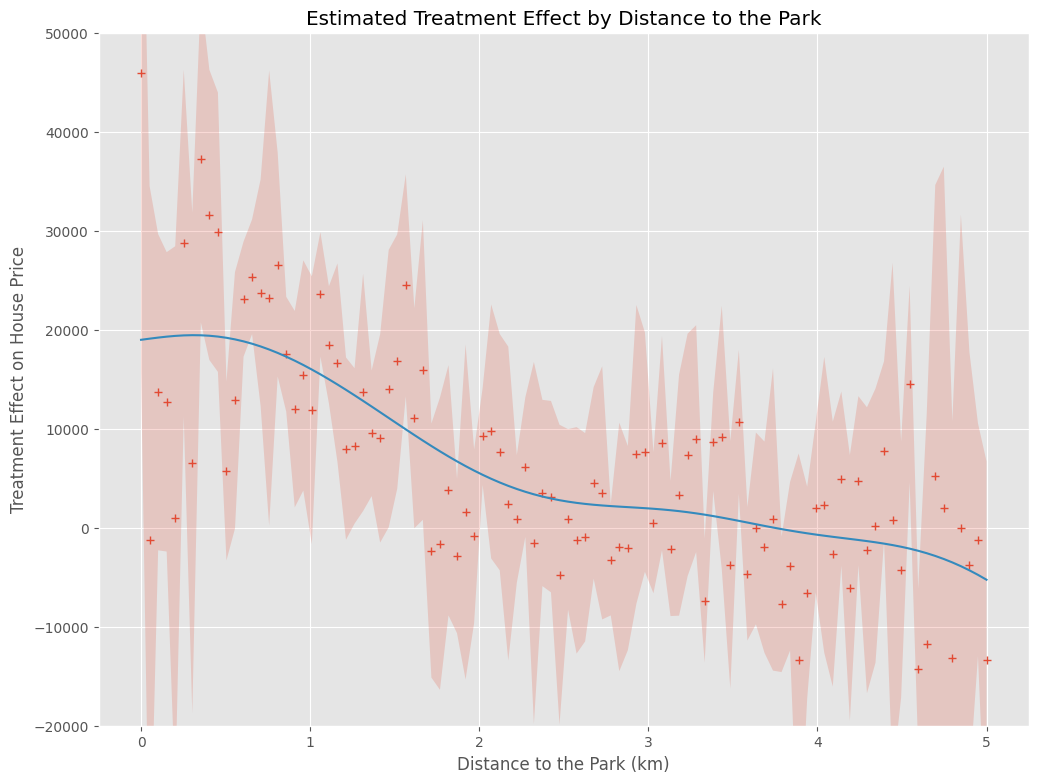

In [9]:
# 結果のプロット

# カーネル回帰でE[Y|X]を算出
kr = KernelReg(treatment_effects,X_test,'c',bw=[0.5])
y_pred, _ = kr.fit(X_test)

# グラフ化
plt.plot(X_test, treatment_effects,'+')
plt.fill_between(X_test.ravel(), treatment_confs[0], treatment_confs[1], alpha=0.2)
plt.plot(X_test, y_pred)
plt.ylim(-20000,50000)
plt.xlabel("Distance to the Park (km)")
plt.ylabel("Treatment Effect on House Price")
plt.title("Estimated Treatment Effect by Distance to the Park")
plt.grid(True)
plt.show()

# ＋が因果効果の推定結果（点推定）、薄い赤の部分が信頼区間（区間推定）、青い実線が因果効果の推定結果を平滑化したもの（傾向線）です。
# 信頼区間の幅が、結構大きなことが分かります。

    カーネル回帰の設定:
    ・kr = KernelReg(treatment_effects,X_test,'c',bw=[0.5]): カーネル回帰モデルを設定します。
    ここで、treatment_effectsは従属変数、X_testは独立変数となります。'c'は連続変数を意味し、bw=[0.5]はバンド幅を0.5として設定しています。

    カーネル回帰による平滑化の実施:
    ・y_pred, _ = kr.fit(X_test): カーネル回帰モデルを用いてX_testの値に基づく平滑化された因果効果を計算します。

    グラフのプロット:
    ・plt.plot(X_test, treatment_effects,'+'): X_testに対する因果効果treatment_effectsをプロットします。各点は+マークで表示されます。
    ・plt.fill_between(X_test.ravel(), treatment_confs[0], treatment_confs[1], alpha=0.2): 信頼区間を塗りつぶしでプロットします。alpha=0.2は透明度を指定しています。
    ・plt.plot(X_test, y_pred): 平滑化された因果効果y_predをプロットします。
    ・その他のplt関数は、グラフの各種設定やラベル、タイトルの追加を行っています。
    ・plt.show(): 上記の設定に基づき、グラフを表示します。


## ハイパーパラメータをチューニングする
    因果フォレストそのもののハイパーパラメータを調整し最適なモデルを探索し設定します。

    以下、コードです。

In [10]:
# 因果フォレストのハイパーパラメータの探索範囲の設定
param_grid = {
    'model_y':[LinearRegression()],
    'model_t':[LogisticRegression()],
    'discrete_treatment':[True],
    'n_estimators': [16, 48, 100],
    'min_samples_leaf': [5, 10],
    'max_depth': [3, 5, None],
}

# ハイパーパラメータチューニングの実施
best_model, best_params, best_score = cs_grid_search(
    Y.values,
    T.values,
    X.values,
    W.values,
    CausalForestDML,
    param_grid
)

# 最適モデルの設定
model = best_model

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Could not generate out-of-bag predictions on some training data. Consider increasing the number of trees. `ate_` results will take the average of the subset of training data for which out-of-bag predictions where available.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Could not generate out-of-bag predictions on some training data. Consider increasing the number of trees. `ate_` results will take the average of the subset of training data for which out-of-bag predictions where available.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Could not generate out-of-bag predictions on some training data. Consider incr

    ハイパーパラメータの探索範囲の設定:
    ・param_gridに、チューニングを行いたいハイパーパラメータの候補のリストを指定しています。
    ・model_yとmodel_tは、アウトカムモデルとトリートメントモデルに使用するモデルを指定します。
    ・discrete_treatmentは、トリートメントが離散的かどうかを示すフラグです。
    ・n_estimatorsは、因果フォレスト内の決定木の数を指定します。
    ・min_samples_leafは、各決定木の葉の最小サンプル数を指定します。
    ・max_depthは、各決定木の最大深さを指定します。

    ハイパーパラメータチューニングの実施:
    ・既に定義されたcs_grid_search関数を使用して、最適なハイパーパラメータの組み合わせを探索しています。
    ・cs_grid_search関数は、指定されたハイパーパラメータの探索範囲を元にクロスバリデーションを行い、最も良い性能を持つモデルとそのハイパーパラメータ、およびスコアを返します。

    最適モデルの設定:
    ・チューニング後の最適なモデルをmodelという変数に格納しています。

    共変量Xの特定の値の因果効果であるCATE（Conditional Average Treatment Effect）を推定します。

    以下、コードです。

In [11]:
# 距離ごとの因果効果の推定
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
treatment_effects = model.effect(X_test)
treatment_confs = model.effect_interval(X_test, T0=0, T1=1, alpha=0.05)

    結果をプロットします。推定した因果効果とその信頼区間を表示しています。さらに、推定した因果効果をカーネル回帰を使用して平滑化しています。

    以下、コードです。

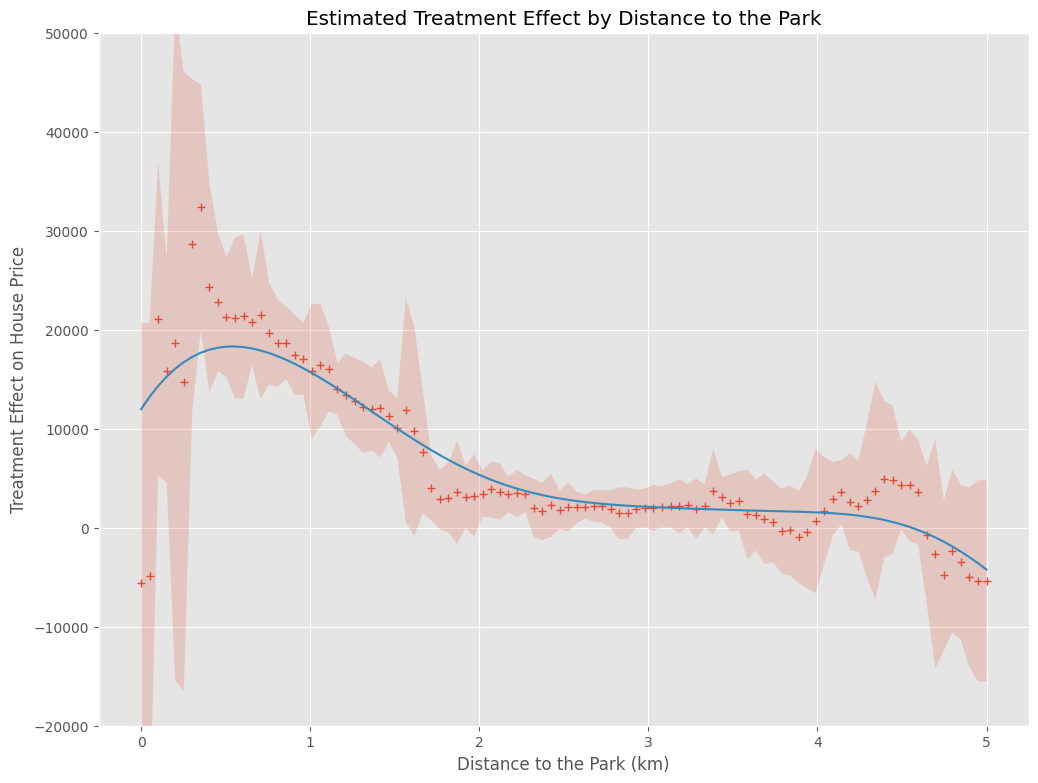

In [12]:
# 結果のプロット

# カーネル回帰でE[Y|X]を算出
kr = KernelReg(treatment_effects,X_test,'c',bw=[0.5])
y_pred, _ = kr.fit(X_test)

# グラフ化
plt.plot(X_test, treatment_effects,'+')
plt.fill_between(X_test.ravel(), treatment_confs[0], treatment_confs[1], alpha=0.2)
plt.plot(X_test, y_pred)
plt.ylim(-20000,50000)
plt.xlabel("Distance to the Park (km)")
plt.ylabel("Treatment Effect on House Price")
plt.title("Estimated Treatment Effect by Distance to the Park")
plt.grid(True)
plt.show()

# ＋が因果効果の推定結果（点推定）、薄い赤の部分が信頼区間（区間推定）、青い実線が因果効果の推定結果を平滑化したもの（傾向線）です。
# 信頼区間の幅が狭くなり、傾向が明確になっていることが分かります。

## 事例２

    事例説明
    ・業種: 製薬業
    ・課題: 新しい薬の治療効果を評価したい。
    ・推論したい因果: 新しい薬の摂取が患者の健康スコアに与える影響。

    Y,T,X,W
    ・Y: 患者の健康スコア（数値、高いほど健康状態が良い）
    ・T: 新しい薬の摂取（1 = 新しい薬を摂取, 0 = プラセボを摂取）
    ・X: 患者の年齢
    ・W: 患者の性別、基礎疾患の有無、治療開始前の健康スコア

    新しい薬の摂取が患者の健康スコアに与える影響を、患者の年齢に応じて評価しています。

    では、データセットを読み込みます。

    以下、コードです。

In [13]:
# データセットのロード
df = pd.read_csv("https://www.salesanalytics.co.jp/xnlp")

display(df) #確認

,Health_Score,Treatment,Age,Gender,Underlying_Disease,Pre-treatment_Health_Score
0,108.463794,0,64,1,0,87
1,100.183831,0,67,1,0,69
2,109.025367,0,73,1,0,84
3,83.793285,0,20,0,0,68
4,83.643075,0,23,1,0,55
...,...,...,...,...,...,...
4995,100.894809,0,59,1,0,88
4996,110.693951,1,58,0,0,52
4997,105.151079,0,74,0,0,59
4998,105.178232,0,59,0,0,76


    ・Health_Score: 個人の健康スコアを示す数値です。Yです。
    ・Treatment: 処置（おそらくある種の治療や介入）の有無を示すバイナリ変数です（0 = 受けていない, 1 = 受けている）。Tです。
    ・Age: 個人の年齢を示す数値です。Xです。
    ・Gender: 個人の性別を示すバイナリ変数です（0 = 男性, 1 = 女性）。Wです。
    ・Underlying_Disease: 基礎疾患の有無を示すバイナリ変数です（0 = なし, 1 = あり）。Wです。
    ・Pre-treatment_Health_Score: 処置または治療前の健康スコアを示す数値です。Wです。

    Y,T,X,Wを設定していきます。

    以下、コードです。

In [14]:
# 変数設定
Y_col = "Health_Score"
T_col = "Treatment"
X_list = ["Age"]
W_list = ["Gender","Underlying_Disease","Pre-treatment_Health_Score"]

# データ設定
Y = df[Y_col]
T = df[T_col]
X = df[X_list]
W = df[W_list]

## ハイパーパラメータをチューニングしない
    因果フォレストを学習します。

    以下、コードです。

In [15]:
# CausalForestDMLのインスタンスを作成
model = CausalForestDML(
    model_y=LinearRegression(),
    model_t=LogisticRegression(),
    discrete_treatment=True
)

# 学習
model.fit(Y, T, X=X, W=W)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


    共変量Xの特定の値の因果効果であるCATE（Conditional Average Treatment Effect）を推定します。

    以下、コードです。

In [16]:
# 年齢ごとの因果効果の推定
X_test = np.linspace(20, 80, 100).reshape(-1, 1)
treatment_effects = model.effect(X_test)
treatment_confs = model.effect_interval(X_test, T0=0, T1=1, alpha=0.05)

    結果をプロットします。推定した因果効果とその信頼区間を表示しています。さらに、推定した因果効果をカーネル回帰を使用して平滑化しています。

    以下、コードです。

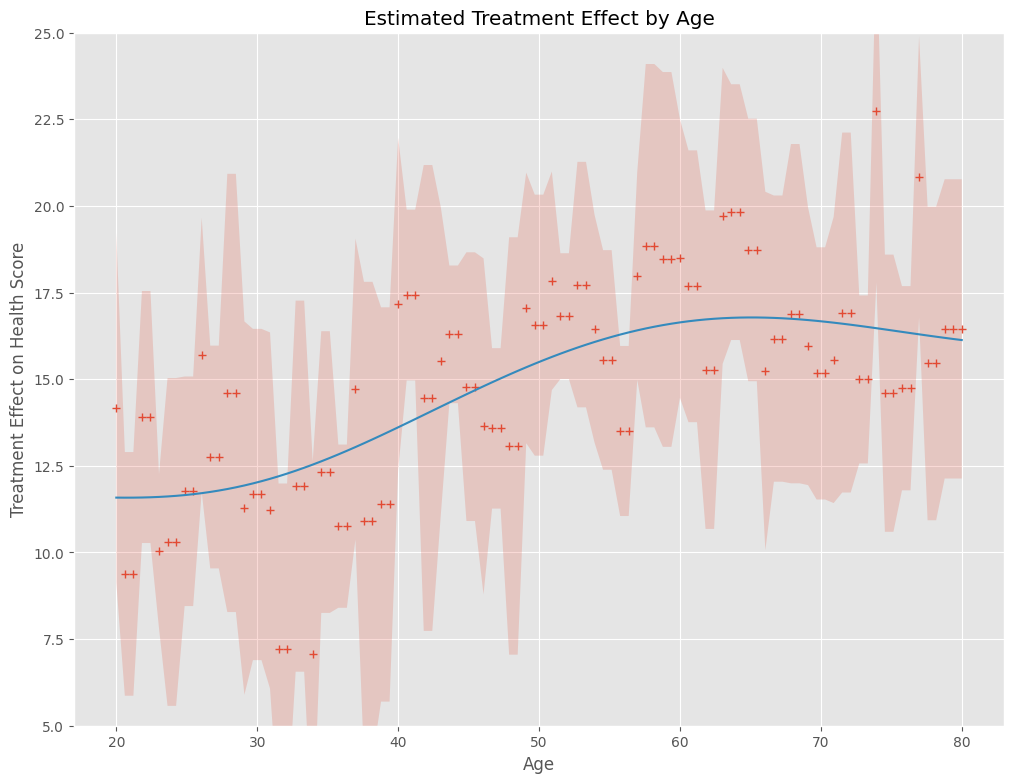

In [17]:
# 結果のプロット

# カーネル回帰でE[Y|X]を算出
kr = KernelReg(treatment_effects,X_test,'c',bw=[10])
y_pred, _ = kr.fit(X_test)

# グラフ化
plt.plot(X_test, treatment_effects,'+')
plt.fill_between(X_test.ravel(), treatment_confs[0], treatment_confs[1], alpha=0.2)
plt.plot(X_test, y_pred)
plt.ylim(5,25)
plt.xlabel("Age")
plt.ylabel("Treatment Effect on Health Score")
plt.title("Estimated Treatment Effect by Age")
plt.grid(True)
plt.show()

# ＋が因果効果の推定結果（点推定）、薄い赤の部分が信頼区間（区間推定）、青い実線が因果効果の推定結果を平滑化したもの（傾向線）です。
# 信頼区間の幅が、結構大きなことが分かります。

## ハイパーパラメータをチューニングする
    因果フォレストそのもののハイパーパラメータを調整し最適なモデルを探索し設定します。

    以下、コードです。

In [18]:
# 因果フォレストのハイパーパラメータの探索範囲の設定
param_grid = {
    'model_y':[LinearRegression()],
    'model_t':[LogisticRegression()],
    'discrete_treatment':[True],
    'n_estimators': [16, 48, 100],
    'min_samples_leaf': [5, 10],
    'max_depth': [3, 5, None],
}

# ハイパーパラメータチューニングの実施
best_model, best_params, best_score = cs_grid_search(
    Y.values,
    T.values,
    X.values,
    W.values,
    CausalForestDML,
    param_grid
)

# 最適モデルの設定
model = best_model

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Could not generate out-of-bag predictions on some training data. Consider increasing the number of trees. `ate_` results will take the average of the subset of training data for which out-of-bag predictions where available.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Could not generate out-of-bag predictions on some training data. Consider increasing the number of trees. `ate_` results will take the average of the subset of training data for which out-of-bag predictions where available.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Could not generate out-of-bag predictions on some training data. Consider incr

    共変量Xの特定の値の因果効果であるCATE（Conditional Average Treatment Effect）を推定します。

    以下、コードです。

In [19]:
# 年齢ごとの因果効果の推定
X_test = np.linspace(20, 80, 100).reshape(-1, 1)
treatment_effects = model.effect(X_test)
treatment_confs = model.effect_interval(X_test, T0=0, T1=1, alpha=0.05)

    結果をプロットします。推定した因果効果とその信頼区間を表示しています。さらに、推定した因果効果をカーネル回帰を使用して平滑化しています。

    以下、コードです。

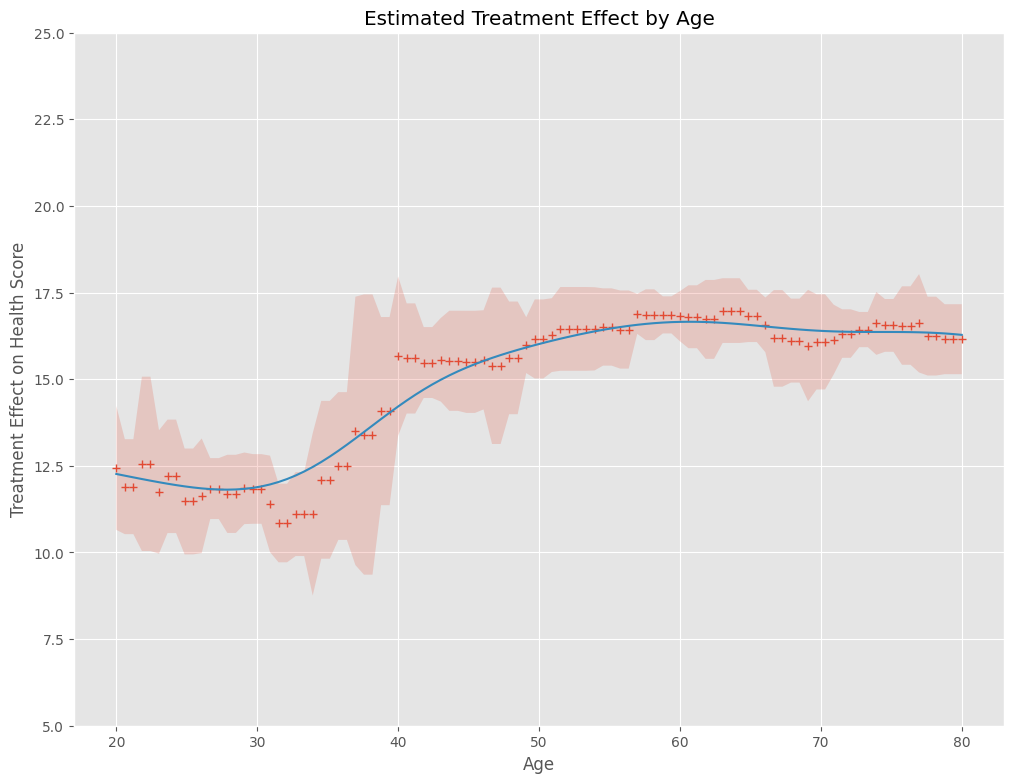

In [20]:
# 結果のプロット

# カーネル回帰でE[Y|X]を算出
kr = KernelReg(treatment_effects,X_test,'c',bw=[5])
y_pred, _ = kr.fit(X_test)

# グラフ化
plt.plot(X_test, treatment_effects,'+')
plt.fill_between(X_test.ravel(), treatment_confs[0], treatment_confs[1], alpha=0.2)
plt.plot(X_test, y_pred)
plt.ylim(5,25)
plt.xlabel("Age")
plt.ylabel("Treatment Effect on Health Score")
plt.title("Estimated Treatment Effect by Age")
plt.grid(True)
plt.show()

# ＋が因果効果の推定結果（点推定）、薄い赤の部分が信頼区間（区間推定）、青い実線が因果効果の推定結果を平滑化したもの（傾向線）です。
# 信頼区間の幅が狭くなり、傾向が明確になっていることが分かります。

## まとめ
    今回は、PythonのEconMLライブラリを用いた因果フォレストそのもののハイパーパラメータをチューニングし最適化しました。

    このEconMLのCausalForestDMLには、3種類のハイパーパラメータが登場します。
    ・因果フォレストそのものののハイパーパラメータ
    ・トリートメントモデルのハイパーパラメータ
    ・アウトカムモデルのハイパーパラメータ

    トリートメントモデルとアウトカムモデルに関しては、そのモデル構築で利用するアルゴリズムにハイパーパラメータがある場合です。

    次回は、トリートメントモデルとアウトカムモデルのハイパーパラメータのチューニングも扱います。